In [ ]:
import tensorflow as tf

# ANN code preparation:

1. load in data
2. build model (sequential dense layeres ending with multiclass logistic regression)
3. train model (same of code for binary logistic regression and others)
4. evaluate the model (also same)
5. make predictions (being able to see what the neural network is getting wrong will be insightful)

- MNIST dataset contains grayscale images of size 28 x 28 (would be 28 x 28 x 3 if they had color)


In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# must scale the color values to 0..1
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x train shape:", x_train.shape)
# x_train is shape N x 28 x 28
# y_train is shape N

11501568/11490434 [==============================] - 0s 0us/step
x train shape: (60000, 28, 28)


In [ ]:
model = tf.keras.models.Sequential([
  # keras handles flattening (to get to an NxD array suitable for the model)                                  
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  # relu is default the best activation (no diminshing gradient)
  # the value of 128 (hidden units) comes from hyperparameter selection via trial-and-error, random search, and past experience
  tf.keras.layers.Dense(128, activation='relu'),
  # dropout layer will randomly bring 20% of the input nodes to 0, its a type of regularization
  # dont want NN to depend on any single input too strongly
  # teaches NN to learn more evenly from all its inputs
  tf.keras.layers.Dropout(.2),
  # multiclass logistic regression -> softmax
  # 10 different classes (digits)
  tf.keras.layers.Dense(10, activation='softmax'),
])

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Explanation of sparse categorical crossentropy

In normal cross entropy loss, we have K output probabilities, corresponding to the K classes (K = 10 in our case). The one-hot encoding of the target is an array of size K where all values except 1 are 0, and 1 is 1. The loss is the summation of these multiplied by the log of y hat.

The one-hot array is sparse (9/10 entries are 0), so its suboptimal to compute all these entries, since its redundant to add up all these 0s. The sparse categorical crossentropy allows us to just consider the non-one-hot-encoded target, so just take the log of this (by indexing the prediction).

In [8]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2964 - accuracy: 0.9140 - val_loss: 0.1548 - val_accuracy: 0.9532
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1446 - accuracy: 0.9577 - val_loss: 0.1013 - val_accuracy: 0.9688
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1088 - accuracy: 0.9674 - val_loss: 0.0877 - val_accuracy: 0.9725
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0894 - accuracy: 0.9727 - val_loss: 0.0783 - val_accuracy: 0.9761
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0738 - accuracy: 0.9767 - val_loss: 0.0716 - val_accuracy: 0.9777
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0673 - accuracy: 0.9787 - val_loss: 0.0744 - val_accuracy: 0.9778
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0586 - accuracy: 0.9815 - val_loss: 0.0739 - val_accuracy:

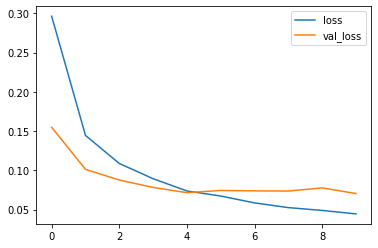

In [9]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

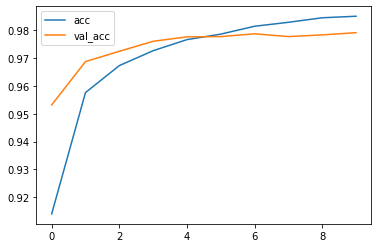

In [10]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [11]:
# Evaluate model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0705 - accuracy: 0.9792
[0.07048633694648743, 0.979200005531311]


Confusion matrix, without normalization
[[ 971    0    1    2    0    1    2    1    1    1]
 [   0 1126    1    1    0    0    2    0    5    0]
 [   4    0 1008    1    3    0    2    6    7    1]
 [   0    0    3  987    0    3    0    6    4    7]
 [   2    0    2    0  954    0    5    1    2   16]
 [   2    0    0    5    1  869    7    1    3    4]
 [   4    3    1    1    6    3  938    0    2    0]
 [   1    5   11    5    0    0    0  998    3    5]
 [   7    0    2    2    4    2    3    3  946    5]
 [   1    2    0    3    3    1    0    3    1  995]]


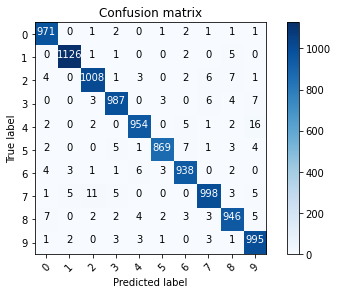

In [14]:
# Plot confusion matrix (for each label, how many prediction corresponded to that label?)
# Hopefully, most entries are along the diagonal (entries = prediction)
# Very interpretable here since we're working with images
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  '''
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting "normalize=True
  '''
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=l)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# notice how most of the wrong predictions are with 4 and 9, or 2 and 7. makes sense

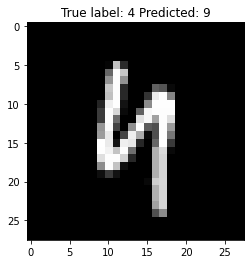

In [23]:
# Show some misclassified examples
# np.where() returns index value where input array is true (returns 2 things so grab the first, which is the actuaal indices)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx) # select one of the randomly misclassified indices
plt.imshow(x_test[i], cmap='gray') # so it doesnt show as a heat map
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));